### Prepare a classification model using SVM for salary data

In [2]:
#importing requried libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

C:\Users\MBARANID\AppData\Local\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
#importing dataset using pandas

In [3]:
salary_df=pd.read_csv('SalaryData_Train(1).csv')

In [4]:
#Performing EDA

In [5]:
salary_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
salary_df.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
#shape of dataset
salary_df.shape

(30161, 14)

#### Dataset has 30161 rows and 14 columns

In [9]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


### The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

In [10]:
salary_df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

In [11]:
salary_df.ndim

2

In [12]:
salary_df.axes

[RangeIndex(start=0, stop=30161, step=1),
 Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
        'occupation', 'relationship', 'race', 'sex', 'capitalgain',
        'capitalloss', 'hoursperweek', 'native', 'Salary'],
       dtype='object')]

### axes is a function of the matplotlib library that adds axes to the current graph and makes it as current axes.

In [13]:
#Checking for missing data
salary_df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

### There is no any missing value in the dataset

In [15]:
#checking for duplication of data
salary_df[salary_df.duplicated()].shape

(3258, 14)

In [16]:
#displying duplicate values
salary_df[salary_df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [17]:
#droping the duplicate rows
salary_df=salary_df.drop_duplicates()

In [18]:
#checking for duplication of data
salary_df[salary_df.duplicated()].shape

(0, 14)

### Now there is no any duplicate values

In [19]:
#checking unique values
salary_df.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

In [20]:
salary_df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

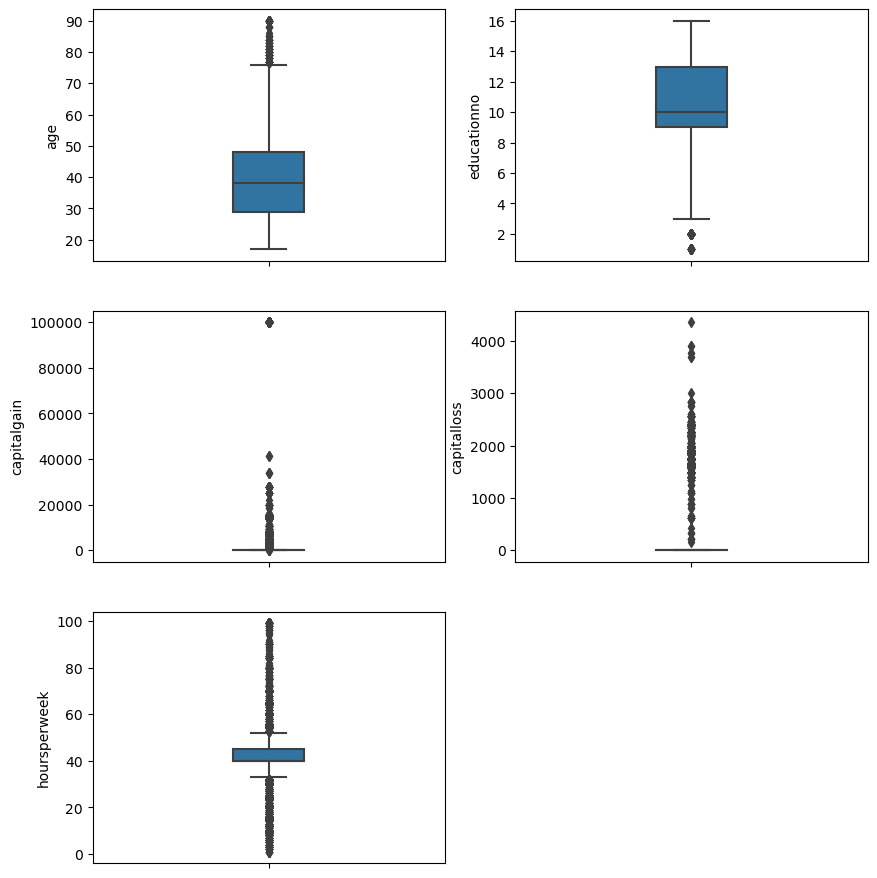

In [21]:
# Drawing boxplot for indepent variables with continuous values
cols = ['age','educationno', 'capitalgain','capitalloss', 'hoursperweek']

plt.figure(figsize=(10,15))
i=1
for col in cols:
    plt.subplot(4,2,i)
    sns.boxplot(y=col, data=salary_df,width=0.2)
    i+=1
plt.show()

## Observations:
1. `capitalgain` has highest mean among the other continues independent variables
2. `educationno` has lowest mean
3. `hoursperweek` has high numbers of outliers

In [22]:
salary_df['Salary'].value_counts()

Salary
<=50K    20023
>50K      6880
Name: count, dtype: int64

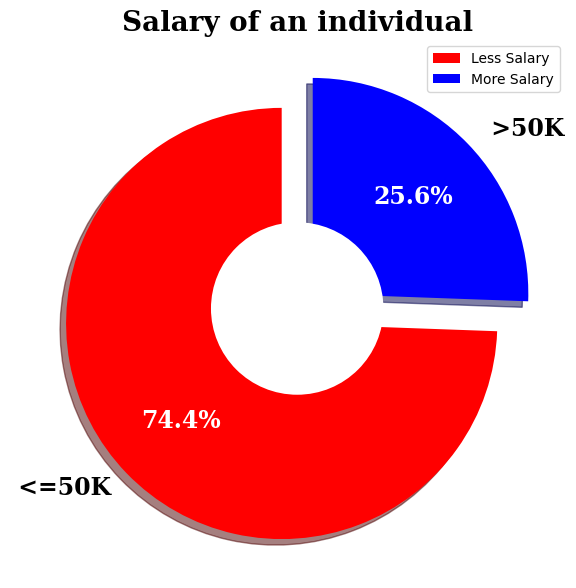

In [23]:
label_data=salary_df['Salary'].value_counts()

explode=(0.1,0.1)
plt.figure(figsize=(12,7))
patches, texts, pcts= plt.pie(label_data,labels=label_data.index,colors=['red','blue'],pctdistance=0.65,shadow=True,
                             startangle=90,explode=explode,autopct='%1.1f%%',
                             textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white')
hfont={'weight':'bold','family':'serif'}
plt.title('Salary of an individual',size=20,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Less Salary','More Salary'],loc="upper right")
plt.show()

### We can see that the salary less than 50k are more in numbers than the individuals having more salary

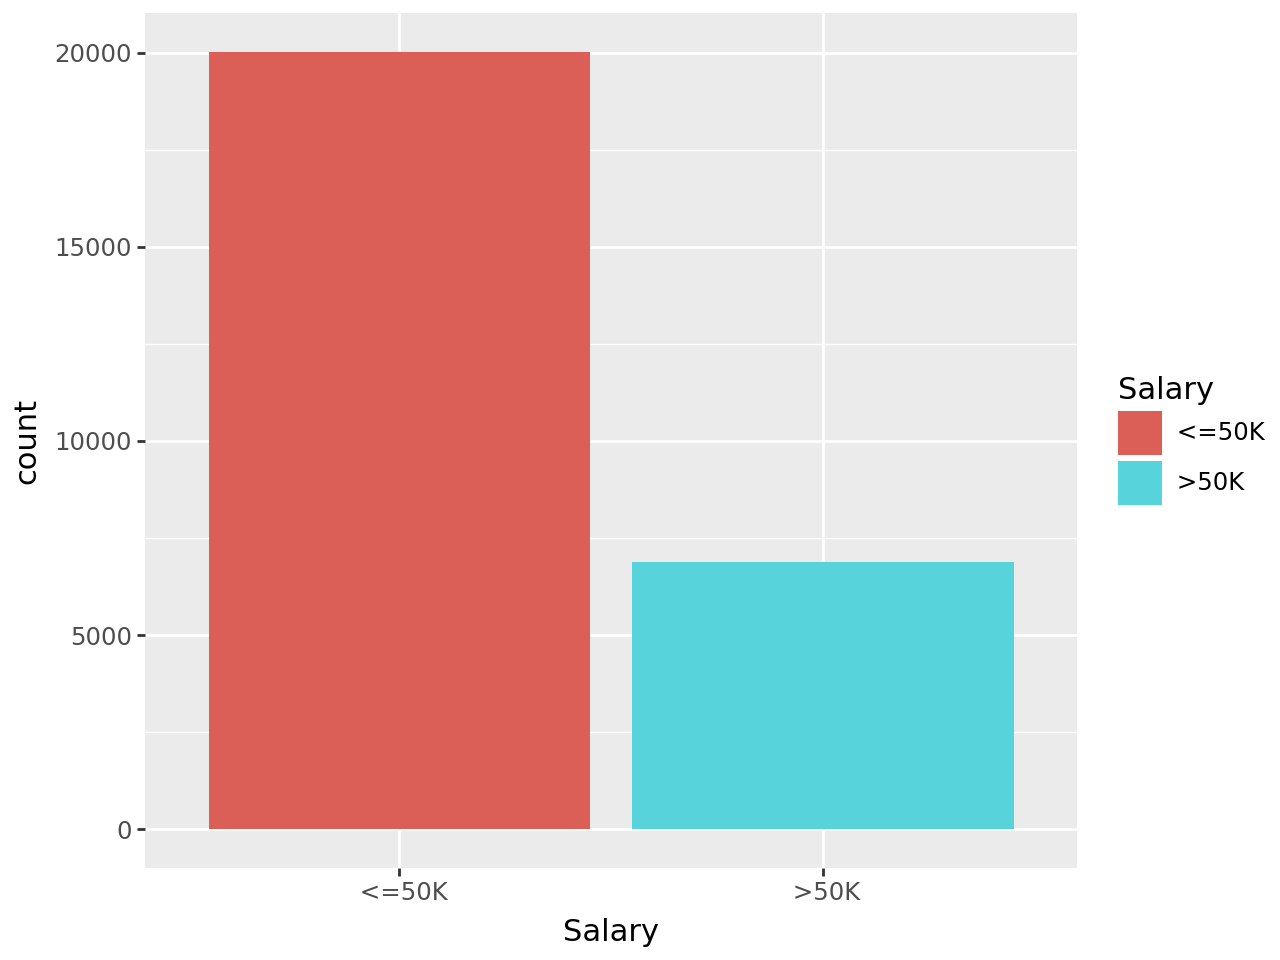

In [24]:
from plotnine.data import huron
from plotnine import ggplot, aes, stat_bin, geom_bar

ggplot(salary_df) + aes(x="Salary",fill='Salary') + geom_bar()

In [25]:
salary_df['sex'].value_counts()

sex
Male      17961
Female     8942
Name: count, dtype: int64

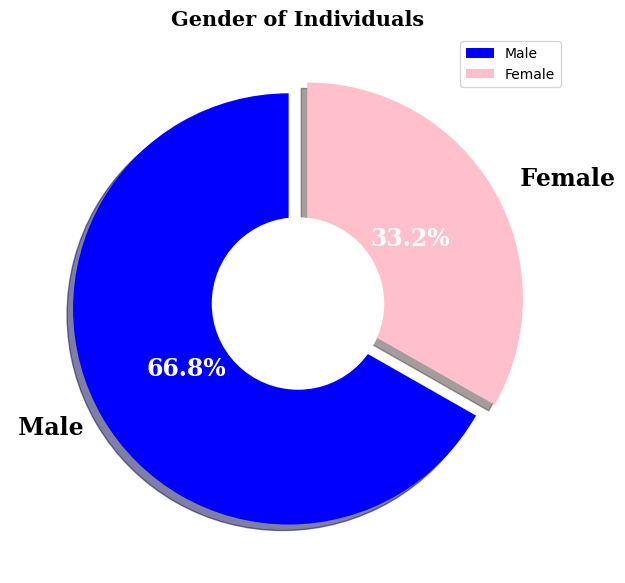

In [26]:
#displaying data by pie chart
label_data=salary_df['sex'].value_counts()

explode=(0.05,0.05)
plt.figure(figsize=(12,7))
patches, texts, pcts= plt.pie(label_data,labels=label_data.index,colors=['blue','pink'],pctdistance=0.55,shadow=True,
                             startangle=90,explode=explode,autopct='%1.1f%%',
                             textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white')
hfont={'weight':'bold','family':'serif'}
plt.title('Gender of Individuals',size=15,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Male','Female'],loc="upper right")
plt.show()

In [27]:
pd.crosstab(salary_df['occupation'],salary_df['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,2816,475
Armed-Forces,8,1
Craft-repair,2472,757
Exec-managerial,1903,1743
Farming-fishing,843,114
Handlers-cleaners,1081,78
Machine-op-inspct,1442,223
Other-service,2782,132
Priv-house-serv,140,1


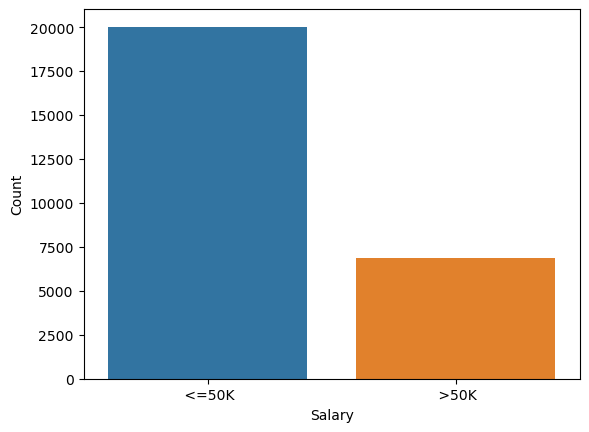

In [28]:
#displaying  animals weather they are 'venomous' or not
sns.countplot(x="Salary", data=salary_df)
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

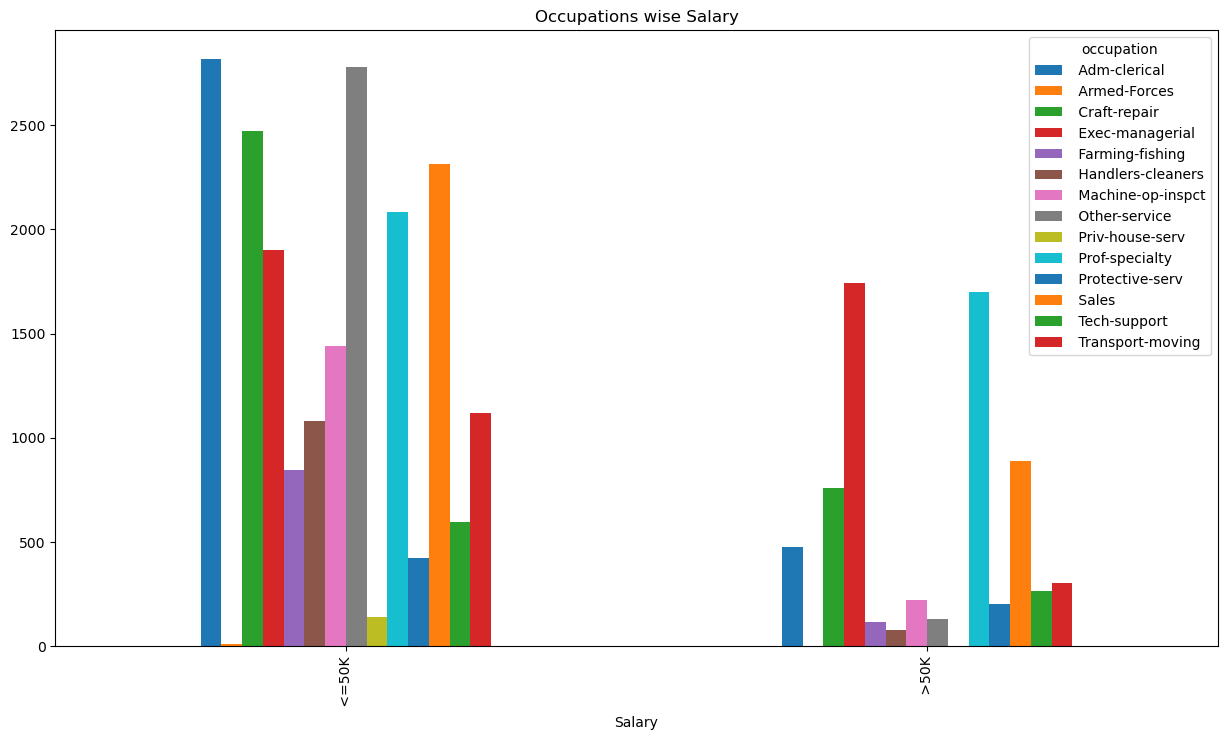

In [29]:
pd.crosstab(salary_df['Salary'], salary_df['occupation']).plot(kind="bar", figsize=(15, 8));
plt.title('Occupations wise Salary',)
plt.plot();

### Observations:
1. Most of the individuals who are having salary less than 50k are doing Adm-clerical ocupation
2. and most of the individuals who are having salary more than 50k are doing Exec-managerial ocupation
3. Occupations like Adm-clerical, Craft-repair, Armed-forces and Prof-specialty are higher in numbers those having salary less than 50k
4. Occupations like Exec-managerial and Prof-specialty are higher in numbers those having salary more than 50k

In [30]:
pd.crosstab(salary_df['workclass'],salary_df['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,573,356
Local-gov,1421,593
Private,14902,4311
Self-emp-inc,466,583
Self-emp-not-inc,1733,698
State-gov,914,339
Without-pay,14,0


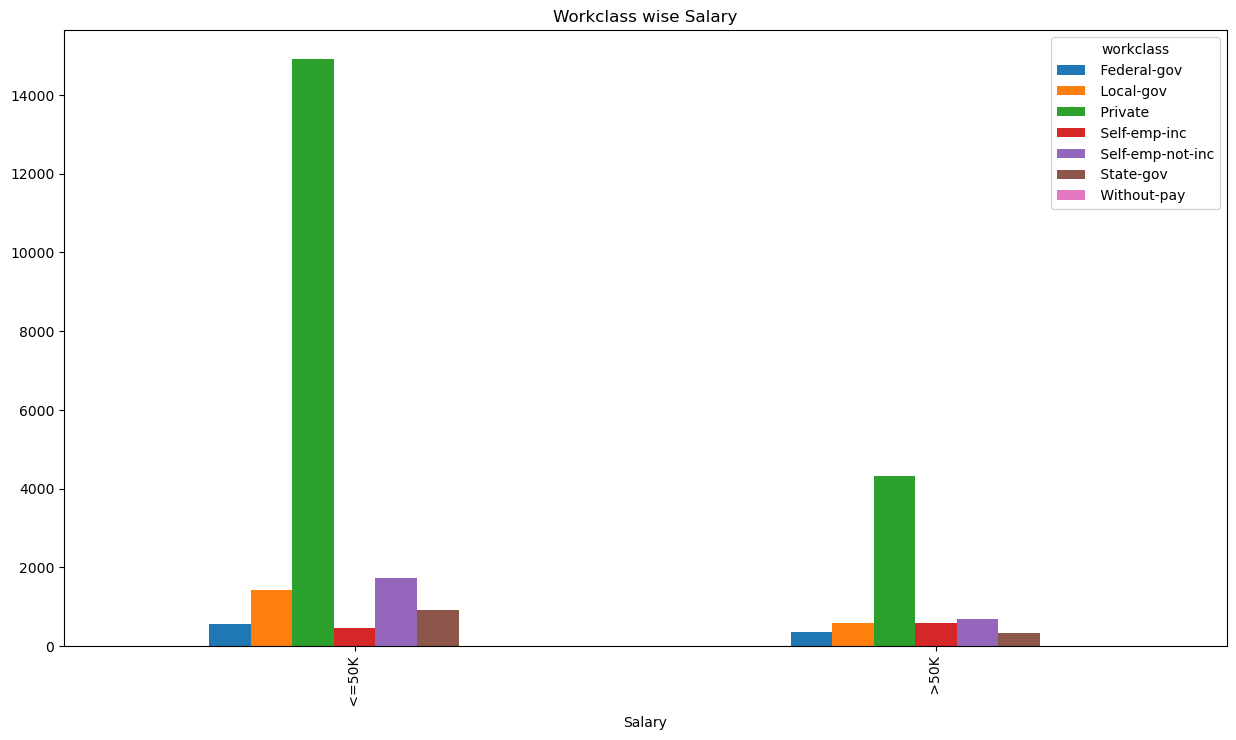

In [31]:
pd.crosstab(salary_df['Salary'], salary_df['workclass']).plot(kind="bar", figsize=(15, 8));
plt.title('Workclass wise Salary',)
plt.plot();

### Observations:
The individual having workclass Private has high Salary compare to any other workclass
The government should promote their wrokclass so more numbers of individuals will join them as gradually there will be an increment in the GDP in government sector

<Axes: xlabel='education'>

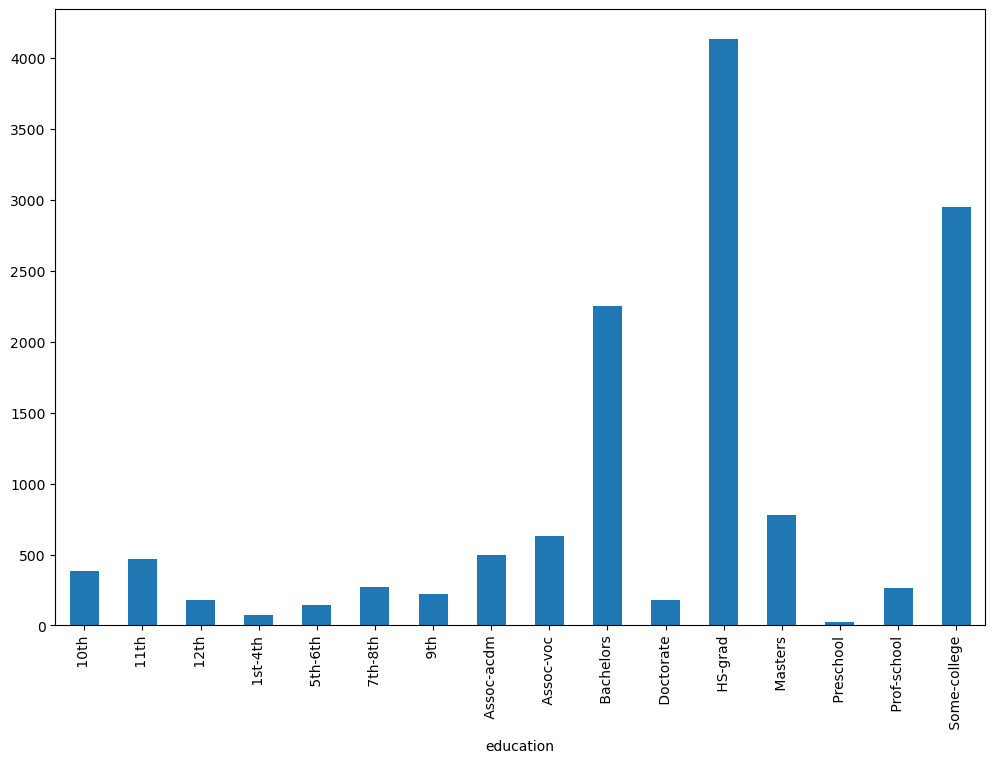

In [32]:
pd.crosstab(salary_df['Salary'],salary_df['education']).mean().plot(kind='bar',figsize=(12, 8))

### Observations:
Individuals who are taking education as HS-grad has highest mean salary followed by some-college
and the pre-school has lowest mean salary The individuals who are taking education in Preschool,Prof-school,Doctorate has to be given some sholarhsips or internships facilities so there will increse in the salary ratio.

<Axes: xlabel='occupation'>

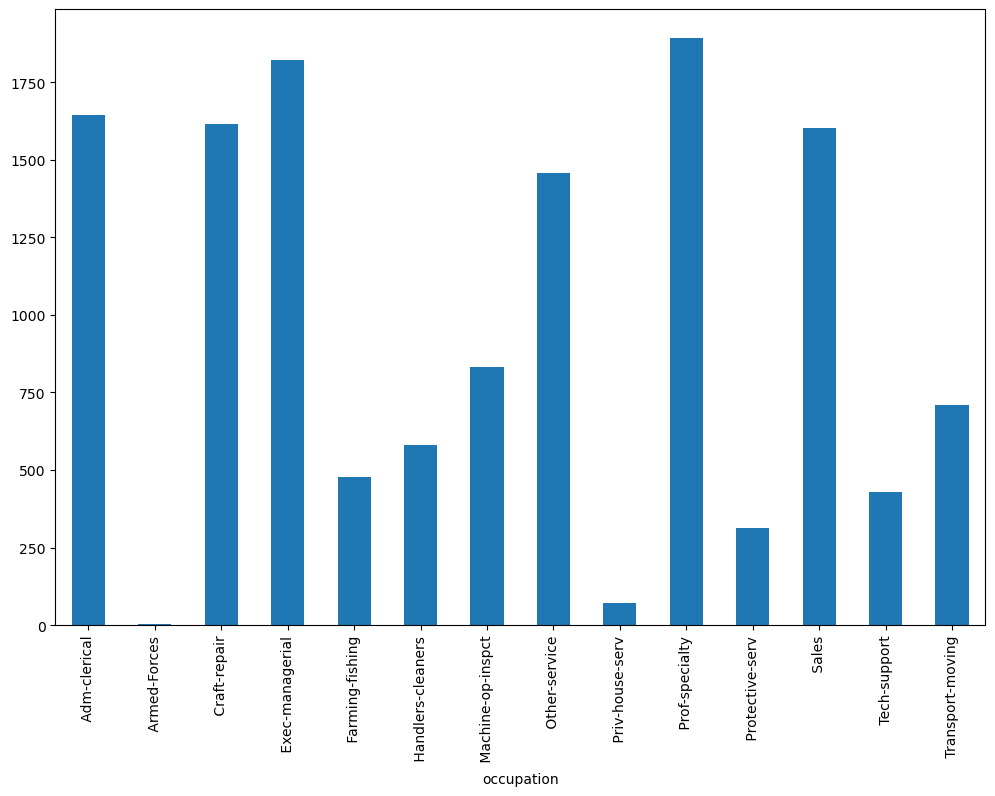

In [33]:
pd.crosstab(salary_df['Salary'],salary_df['occupation']).mean().plot(kind='bar',figsize=(12, 8))

### Observations:
Individuals having the occupation Prof-specialty have the highest mean salary
And the individuals who are serving in armed fores has lowest mean

<Axes: xlabel='sex'>

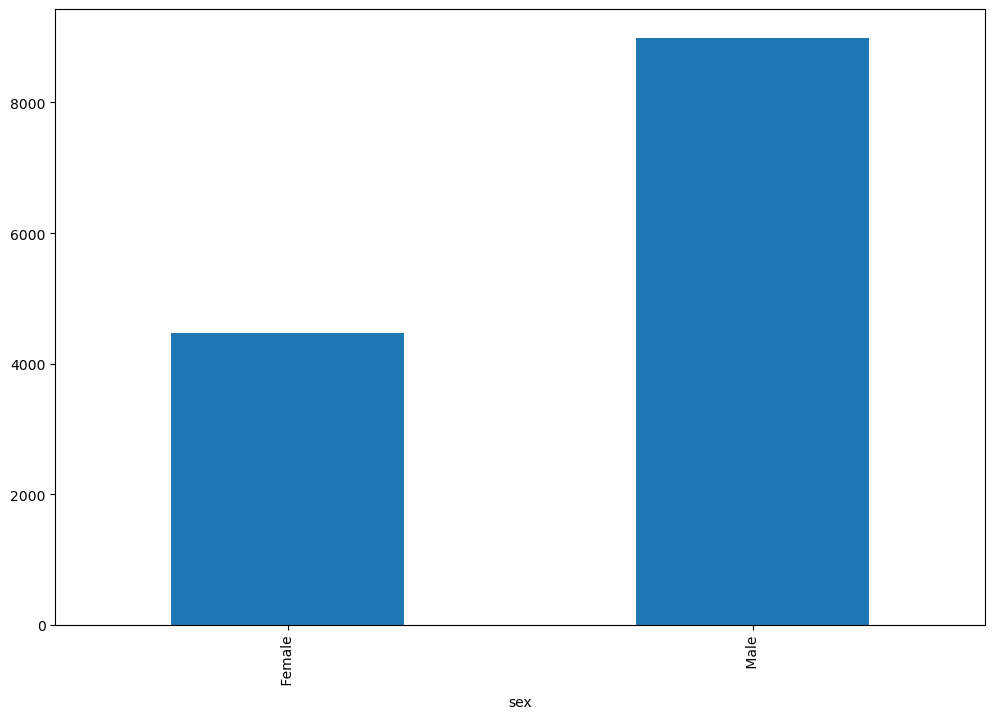

In [34]:
pd.crosstab(salary_df['Salary'],salary_df['sex']).mean().plot(kind='bar',figsize=(12, 8))

### Observations:
Male has highest mean salary
Female has low mean salary

<Axes: xlabel='relationship'>

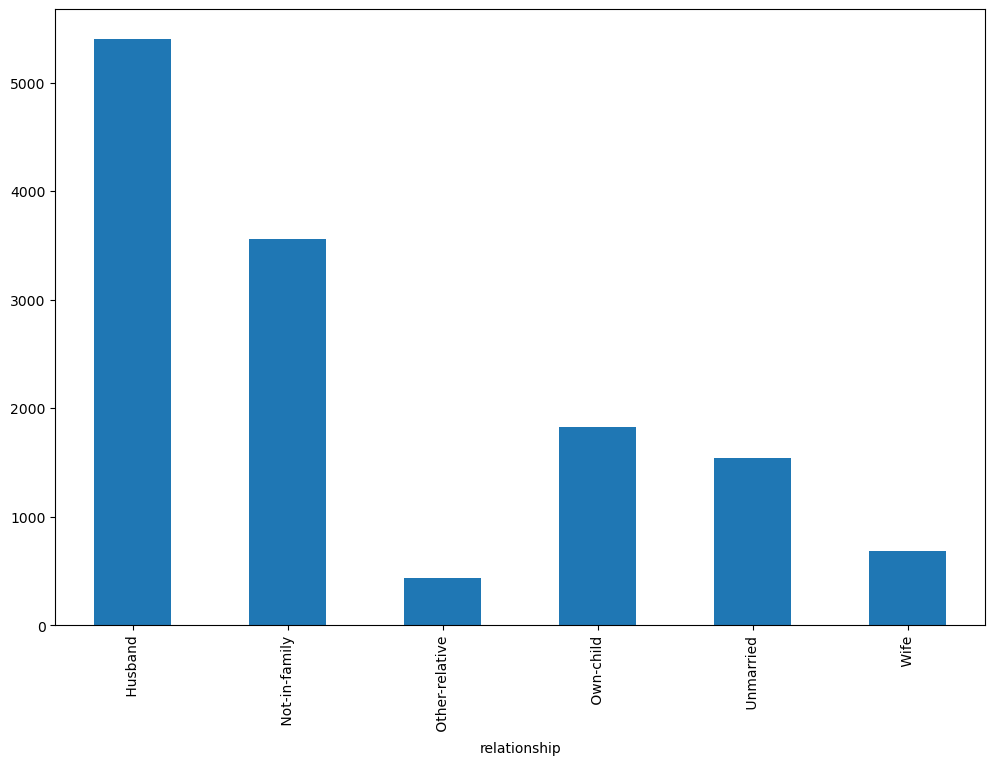

In [35]:
pd.crosstab(salary_df['Salary'],salary_df['relationship']).mean().plot(kind='bar',figsize=(12, 8))

### Observations:
Male who are husband has highest mean salary
while other relatives have low mean salary

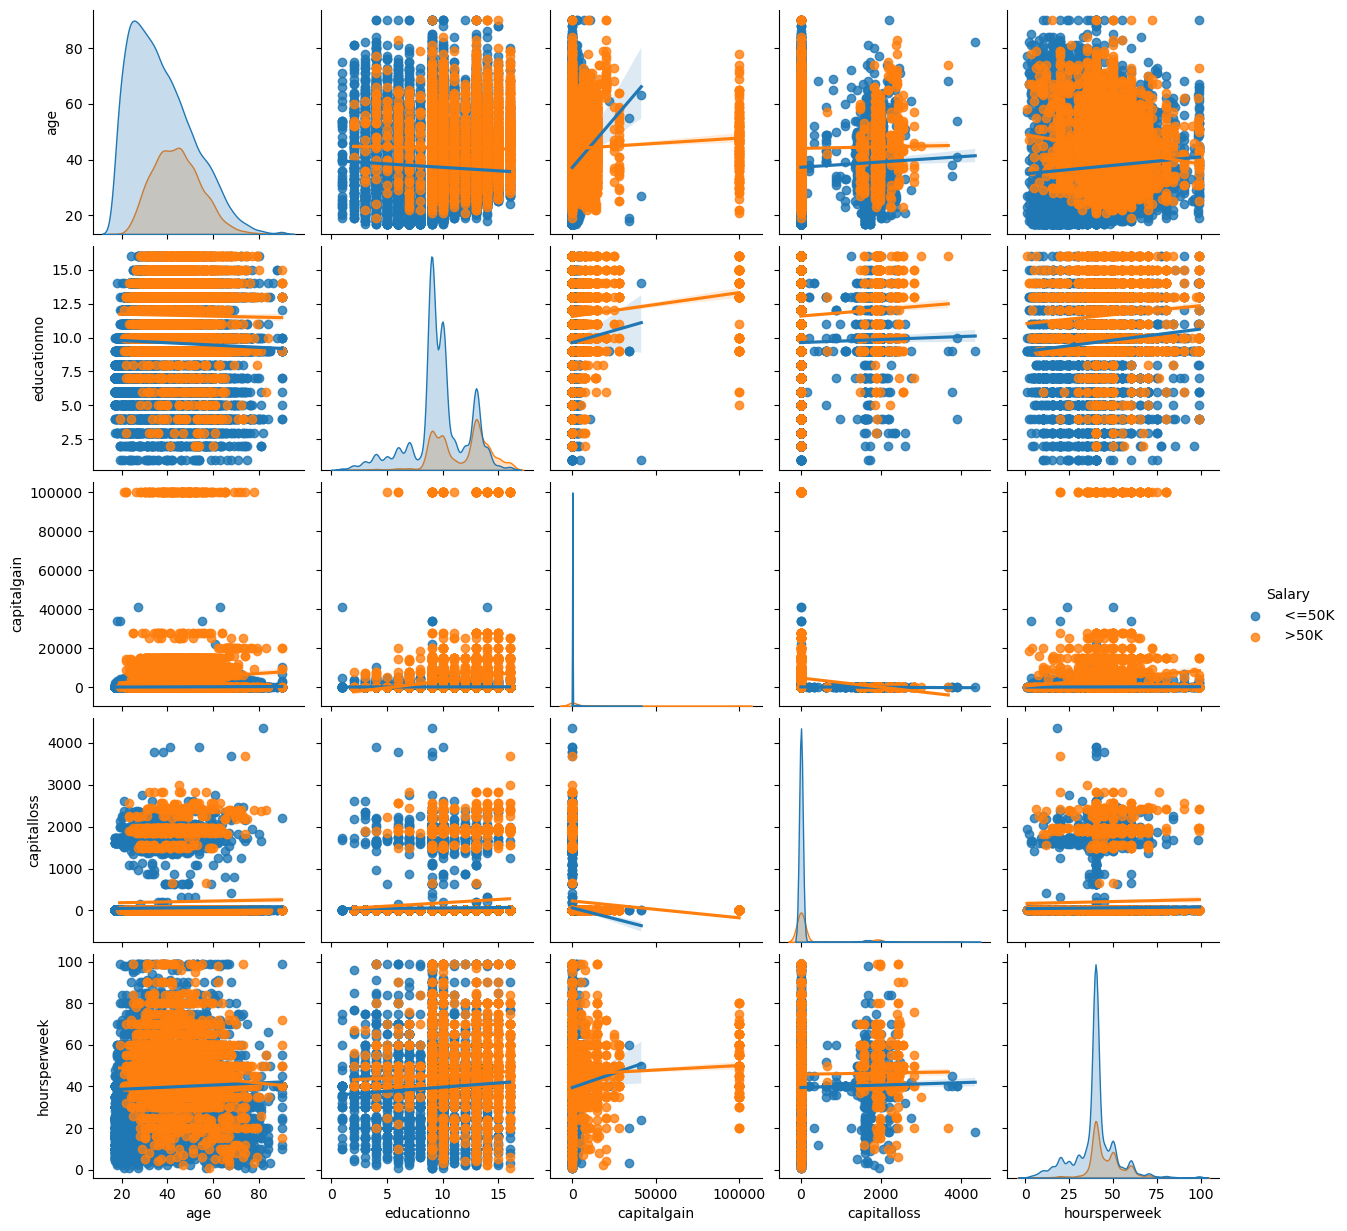

In [36]:
#displaying pairplot to check relationship
sns.pairplot(salary_df,hue='Salary',
             kind='reg',diag_kind='kde')
plt.show()

### Observations:
By looking the above graph we can say that the independent varibles has no any reation with the dependend variable
As the graphs are skewed

In [44]:
# Exclude non-numeric columns
numeric_df = salary_df.select_dtypes(include=['number'])

# Calculate correlation matrix
cor = numeric_df.corr()
cor

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.077235,0.052684,0.072529
educationno,0.038048,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000


### corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.

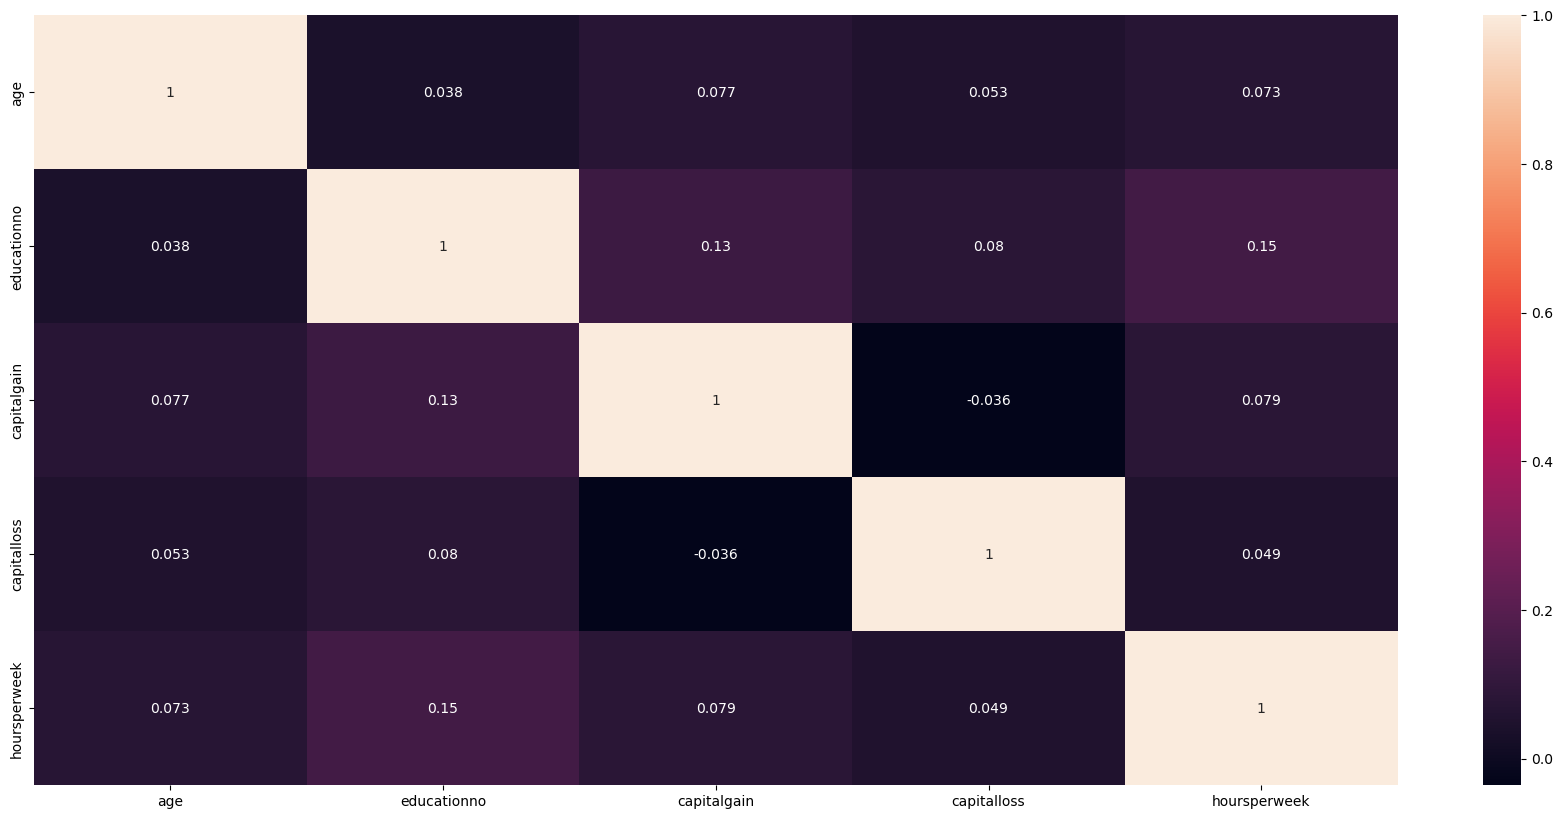

In [45]:
#checking corelation 
plt.figure(figsize=(22,10))
sns.heatmap(cor, annot=True,)
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder

### LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Fit label encoder. Fit label encoder and return encoded labels.

In [47]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native","Salary"]

In [48]:
#Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        salary_df[i]= number.fit_transform(salary_df[i])

In [49]:
salary_df.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
5,37,2,12,14,2,3,5,4,0,0,0,40,37,0
6,49,2,6,5,3,7,1,2,0,0,0,16,21,0
7,52,4,11,9,2,3,0,4,1,0,0,45,37,1
8,31,2,12,14,4,9,1,4,0,14084,0,50,37,1
9,42,2,9,13,2,3,0,4,1,5178,0,40,37,1


## Feature Engineering

### Univariate Feature Selection

In [51]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [53]:
array = salary_df.values
X = array[:,0:13]
Y = array[:,13]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

In [54]:
# summarize scores
set_printoptions(precision=3)    #For regression: f_regression, mutual_info_regression
print(fit.scores_)               #For classification: chi2, f_classif, mutual_info_classif
features = fit.transform(X)

[5.986e+03 3.312e+00 3.181e+02 2.009e+03 8.353e+02 1.853e+02 2.977e+03
 3.504e+01 4.225e+02 7.063e+07 1.163e+06 5.080e+03 2.448e+01]


### Recursive Feature Elimination

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [57]:
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)

In [58]:
# Feature Ranking:
fit.ranking_

array([ 5,  4,  7,  1,  1,  9,  2,  3,  1, 11, 10,  6,  8])

### Feature Importance using Decision Tree

In [59]:
# Feature Importance with Extra Trees Classifier
from sklearn.tree import  DecisionTreeClassifier

In [60]:
# feature extraction
model = DecisionTreeClassifier()
model.fit(X, Y)

DecisionTreeClassifier()

In [61]:
print(model.feature_importances_)

[0.179 0.051 0.016 0.122 0.011 0.074 0.217 0.02  0.006 0.135 0.046 0.104
 0.02 ]


### By feature engineering we have got the features which are more important and less important.so, we will drop the features which are less important

In [62]:
salary_df.pop('maritalstatus')
salary_df.pop('sex')
salary_df.pop('educationno')

0        13
1        13
2         9
3         7
4        13
         ..
30154    14
30155    10
30156    12
30158     9
30160     9
Name: educationno, Length: 26903, dtype: int64

In [63]:
salary_df.head()

,age,workclass,education,occupation,relationship,race,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,0,1,4,2174,0,40,37,0
1,50,4,9,3,0,4,0,0,13,37,0
2,38,2,11,5,1,4,0,0,40,37,0
3,53,2,1,5,0,2,0,0,40,37,0
4,28,2,9,9,5,2,0,0,40,4,0


### Building SVM Models

In [64]:
# SVM Classification
#importing libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

### SVC, or Support Vector Classifier, is a supervised machine learning algorithm typically used for classification tasks. SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes.

In [65]:
ms=MinMaxScaler()
X=pd.DataFrame(ms.fit_transform(X))

In [66]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.102564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,0.493151,0.333333,0.800000,0.866667,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718
26899,0.068493,0.333333,1.000000,0.600000,0.666667,0.769231,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718
26900,0.136986,0.333333,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.948718
26901,0.561644,0.333333,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.948718


In [68]:
Y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25 , random_state=50)

In [70]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20177, 13), (20177,), (6726, 13), (6726,))

### SVM With GridSearch

In [71]:
# kernel = rbf
clf= SVC()
parma_grid = [{'kernel' : ["rbf"],'random_state':[40],'gamma':[0.1],'C':[1]}]

In [72]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['rbf'],
                          'random_state': [40]}])

In [73]:
gsv.best_params_ , gsv.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 40},
 0.8231648922709989)

### Buliding SVM model with RBF Kernel

In [74]:
model_rbf = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1)
model_rbf.fit(X_train,y_train)

SVC(C=1, gamma=0.1, random_state=40)

In [76]:
pred_test_rbf = model_rbf.predict(X_test)

In [77]:
acc = accuracy_score(y_test, pred_test_rbf) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, pred_test_rbf)

Accuracy = 82.11418376449599


array([[4739,  273],
       [ 930,  784]], dtype=int64)

In [78]:
print(classification_report(y_test,pred_test_rbf))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5012
           1       0.74      0.46      0.57      1714

    accuracy                           0.82      6726
   macro avg       0.79      0.70      0.73      6726
weighted avg       0.81      0.82      0.81      6726



In [79]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_rbf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_rbf.score(X_test, y_test)))

Training set score: 0.8249
Test set score: 0.8211


### Buliding SVM model with Linear Kernel

In [80]:
# kernel = linear
clf= SVC()
parma_grid = [{'kernel' : ["linear"],'random_state':[40],'gamma':[0.1],'C':[1]}]

In [81]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['linear'],
                          'random_state': [40]}])

In [82]:
gsv.best_params_ , gsv.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 40},
 0.8078507365293912)

In [83]:
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1)
model_linear.fit(X_train,y_train)

SVC(C=1, gamma=0.1, kernel='linear', random_state=40)

In [84]:
pred_test_linear = model_linear.predict(X_test)

In [85]:
acc1 = accuracy_score(y_test, pred_test_linear) * 100
print("Accuracy =", acc1)
confusion_matrix(y_test, pred_test_linear)

Accuracy = 80.43413618792744


array([[4877,  135],
       [1181,  533]], dtype=int64)

In [86]:
print(classification_report(y_test,pred_test_linear))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5012
           1       0.80      0.31      0.45      1714

    accuracy                           0.80      6726
   macro avg       0.80      0.64      0.66      6726
weighted avg       0.80      0.80      0.77      6726



In [87]:

# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_linear.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_linear.score(X_test, y_test)))

Training set score: 0.8071
Test set score: 0.8043


### Buliding SVM model with Polynomial Kernel

In [88]:
# kernel = polynomial
clf= SVC()
parma_grid = [{'kernel' : ["poly"],'random_state':[40],'gamma':[0.1],'C':[1]}]

In [89]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['poly'],
                          'random_state': [40]}])

In [90]:
gsv.best_params_ , gsv.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 40},
 0.8117660195572519)

In [91]:
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1)
model_poly.fit(X_train,y_train)

SVC(C=1, gamma=0.1, kernel='poly', random_state=40)

In [92]:
pred_test_poly = model_poly.predict(X_test)

In [93]:
acc2 = accuracy_score(y_test, pred_test_poly) * 100
print("Accuracy =", acc2)
confusion_matrix(y_test, pred_test_poly)

Accuracy = 81.07344632768361


array([[4769,  243],
       [1030,  684]], dtype=int64)

In [94]:
print(classification_report(y_test,pred_test_poly))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5012
           1       0.74      0.40      0.52      1714

    accuracy                           0.81      6726
   macro avg       0.78      0.68      0.70      6726
weighted avg       0.80      0.81      0.79      6726



In [95]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_poly.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_poly.score(X_test, y_test)))

Training set score: 0.8131
Test set score: 0.8107


### Buliding SVM model with Sigmoid Kernel

In [96]:
# kernel = sigmoid
clf= SVC()
parma_grid = [{'kernel' : ["sigmoid"],'random_state':[40],'gamma':[0.1],'C':[1]}]

In [97]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['sigmoid'],
                          'random_state': [40]}])

In [99]:
gsv.best_params_ , gsv.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 40},
 0.7935769448292095)

In [100]:
model_sigmoid = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1)
model_sigmoid.fit(X_train,y_train)

SVC(C=1, gamma=0.1, kernel='sigmoid', random_state=40)

In [102]:
pred_test_sigmoid = model_sigmoid.predict(X_test)

In [103]:
acc3 = accuracy_score(y_test, pred_test_linear) * 100

print("Accuracy =", acc3)
confusion_matrix(y_test, pred_test_sigmoid)

Accuracy = 80.43413618792744


array([[4735,  277],
       [1129,  585]], dtype=int64)

In [104]:
print(classification_report(y_test,pred_test_sigmoid))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      5012
           1       0.68      0.34      0.45      1714

    accuracy                           0.79      6726
   macro avg       0.74      0.64      0.66      6726
weighted avg       0.77      0.79      0.76      6726



In [105]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_sigmoid.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_sigmoid.score(X_test, y_test)))

Training set score: 0.7928
Test set score: 0.7910


In [106]:
data = {"MODEL":pd.Series(["Model_RBF","Model_Linear","Model_Poly","Model_Sigmoid"]),"Accuracy":pd.Series([acc,acc1,acc2,acc3])}
acc_table=pd.DataFrame(data)
acc_table.sort_values(['Accuracy'])

,MODEL,Accuracy
1,Model_Linear,80.434136
3,Model_Sigmoid,80.434136
2,Model_Poly,81.073446
0,Model_RBF,82.114184


### Insights:
1. we have Classify the Size_Categorie using SVM model
2. we have build four SVM models using different kernels
3. by using rbf kernel test accuracy is getting 82%
4. by using linear kernel test accuracy is getting 81%
5. by using poly kernel test accuracy is getting 81%
6. by using sigmoid kernel test accuracy is getting 81%
7. so we can use model which is giving us 82% accuracy
8. Model_RBF has training accuracy higher than testing accuracy so there is no any overfitting and underfitting
9. so we will use model which has kernels RBF for Classifying the salary.